In [ ]:
from agent.robot_voice import build_graph
graph=build_graph()

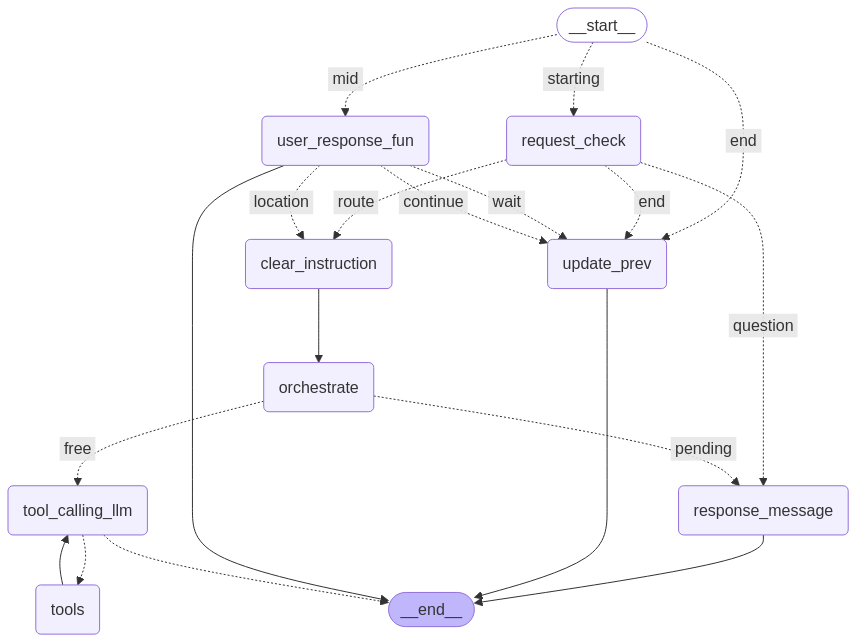

In [9]:
graph.graph_workflow()

In [3]:
response=graph.response("got to bedroom 1 and take bat and come to the park","koti","id_i]jijijijijijij-ijij","starting")

question type: route
####################

[
    {"task 1":"go to bedroom 1 and take bat","route":["current location","bedroom 1"]},
    {"task 2":"come to the park","route":["bedroom 1","park"]}
]

{'id': 'call_hcs1', 'function': {'arguments': '{"A": "current location", "B": "bedroom 1"}', 'name': 'travel'}, 'type': 'function'}
$$$$$$$$$$$$$$$$$$$$
 "current location"
{'id': 'call_070t', 'function': {'arguments': '{"text": "I have arrived at bedroom 1. Could you please bring me the bat so I can take it to the next location?"}', 'name': 'speak'}, 'type': 'function'}
$$$$$$$$$$$$$$$$$$$$
{'id': 'call_wx1r', 'function': {'arguments': '{"A": "bedroom 1", "B": "park"}', 'name': 'travel'}, 'type': 'function'}
$$$$$$$$$$$$$$$$$$$$
 "bedroom 1"
{'id': 'call_yper', 'function': {'arguments': '{"text": "I\'ve arrived at the park with the bat. Is there anything else you need from here or any other location?"}', 'name': 'speak'}, 'type': 'function'}
$$$$$$$$$$$$$$$$$$$$
[{'A': '35 128', 'B': '126 

In [4]:
response

[{'A': '35 128', 'B': '126 189'},
 'I have arrived at bedroom 1. Could you please bring me the bat so I can take it to the next location?',
 {'A': '126 189', 'B': '35 128'},
 "I've arrived at the park with the bat. Is there anything else you need from here or any other location?"]

In [5]:
response[1]

'I have arrived at bedroom 1. Could you please bring me the bat so I can take it to the next location?'

In [6]:
response=graph.middle_response("I have arrived at bedroom 1. Please hand over the bat so I can carry it.","i have handed you the bat you can move now","koti","id_i]jijijijijijij-ijij","mid")

content='move' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 143, 'total_tokens': 145, 'completion_time': 0.01, 'prompt_time': 0.009460487, 'queue_time': 0.051125589, 'total_time': 0.019460487}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None} id='run-b3d967cd-29a3-4305-ac0d-0b98602a1c92-0' usage_metadata={'input_tokens': 143, 'output_tokens': 2, 'total_tokens': 145}


In [7]:
for i in response:
    print(i)

move


In [8]:
graph.status_on("id_i]jijijijijijij-ijij")

question type: route


'is there any thing you want me to do ?'

In [1]:
import markdown2

md = markdown2.Markdown()

In [2]:
text='''## Functionalities of the Vehicle
> 1. Understanding Natural language
> 2. Transforming things from one place to another
> 3. Responding to User inputs
> 4. asks task-specific questions
> 5. performing complex and lengthy workflows flawlessly

## Understanding Natural language

This is a crucial step in the generation of workflow plans and responses.
We use LLMs with tool-calling features to understand the user response accurately and make plans accordingly. We make use of LLM in different ways
> 1. Tool-calling LLM (for Generation of task-specific workflows)
> 2. Input Classification LLM ( for classifying whether the user is asking to perform a Task or the user question refers to a general response like the current position of the vehicle or history of tasks it has performed till now or any functionality related)
> 3. Orchestrator (For making user Input a bit more constructed to make perfect plans)
> 4. Responding LLM ( for responding to the input message given by user. It doesn't refer to location-specific messages)

## Transferring things from one place to another

Here we use a combination of the A* algorithm and decoder.

**A* algorithm** - It is a path-finding algorithm. it is highly accurate in finding the shortest path  between 2 nodes in graph-based environments. In our case, we consider our image as a graph where obstacles are represented by 1s and free paths are represented by 0. We make use of the A* algorithm to find the shortest path between the nodes given by the user(through LLMs)

**Decoder** - The decoder is specifically used to make the outputs generated by the A* algorithm in a way that can be instructed to Arduino so that the vehicle follows that specific path accurately without any directionality errors.

## Responding to user Inputs

There are 3 major reasons for implementing this functionality. 

> 1. What if the vehicle is performing another task while the user requests his task?
> 2. What if there is no such location in the house or industry environment?
> 3. What if the user wants to clarify things like (where it is currently or the history of tasks it has performed till now or any functionality related) rather then making it to perform the task?

In every case, the user question is redirected to Responding LLM. so that it process user input and generate responses accordingly.

## Asks Task Specific questions

currently, the vehicle itself doesn't perform tasks by itself it takes the help of Humans.

The functionality of the vehicle is to Travel, transport and speak. so every time it is performing tasks if the vehicle can't do it by itself it asks for someone who help it out in performing that task.

To make you understand let us consider an example - if the user asks to bring some coffee from the kitchen to the bedroom.  so it first reaches the kitchen and asks for someone who makes the coffee. it weighs until the coffee is done making. then it comes back to the bedroom with the coffee.

## Performing complex and lengthy workflows flawlessly.

**Complex? What complex over here? it is just travelling from one place to another place..** you may get dought like this but I want you to imagene some cases>

> ### *Case 1.*
>   **task in task** (tasks are dependent). if it needed to complete some task which is part of its original task.
> 
> for better understanding let's have an example - same as the previous if someone wants coffee from the kitchen to bedroom . As the vehicle reaches the kitchen when it asks to make coffee, what if the user says that **there is no coffee powder go to the storeroom and bring it back to the kitchen**.
> 
> In this case it has to perform task in task. where it has to make a plan to go to the store room and bring the coffee powder back, then it needs to travel to the bedroom with the coffee as the coffee making is done.
> 
> For implementation I used the concept of **Backtracking**

> ### *case 2*
>  **Task After Task** (tasks are independent): When should Task 2 be completed if it is instructed to start while Task 1 is still in progress?
>
> example: if the vehicle is in the process of bringing coffee to the bedroom if someone instructs it to get the bat from the storeroom to the park. as the tasks are not related to each other it needs to serialise them. one after the other.
>
> to make this happen I used the concept of serialisation.


# To run it on your local system

> **Step 1** : Install docker on your system
> 
> **Step 2** : Clone this repo by using
```python
git clone https://github.com/KoteshwarChinnolla/A_robotic_vehicle
```
> **Step 3**: " create .env file put Langchain and Groq API key
```python
LANG_CHAIN_API_KEY=""
GROQ_API_KEY=""
```
> **Step 4**: open the docker desktop so that it turns on the docker Engine
> 
> **Step 5**:run
```python
docker compose up --build
```
> on your terminal
> 
> Now run the HTML file (Go live) so that you can access it




'''

In [4]:
print(md.convert(text))

<h2>Functionalities of the Vehicle</h2>

<blockquote>
  <ol>
  <li>Understanding Natural language</li>
  <li>Transforming things from one place to another</li>
  <li>Responding to User inputs</li>
  <li>asks task-specific questions</li>
  <li>performing complex and lengthy workflows flawlessly</li>
  </ol>
</blockquote>

<h2>Understanding Natural language</h2>

<p>This is a crucial step in the generation of workflow plans and responses.
We use LLMs with tool-calling features to understand the user response accurately and make plans accordingly. We make use of LLM in different ways</p>

<blockquote>
  <ol>
  <li>Tool-calling LLM (for Generation of task-specific workflows)</li>
  <li>Input Classification LLM ( for classifying whether the user is asking to perform a Task or the user question refers to a general response like the current position of the vehicle or history of tasks it has performed till now or any functionality related)</li>
  <li>Orchestrator (For making user Input a bit m